In [60]:
# create a perceptron learning model from scikit-learn API
# 1. dataset:       from sklearn import datasets 
# 2. spliting:      from sklearn.model_selection import train_test_split
# 3. preprocessing: from sklearn.preprocessing import StandardScalar
# 4. training:      from sklearn.linear_model import perceptron
# 5. evaluating:    from sklearn.metrices import accuracy_score
# 6. ...
from sklearn import datasets
import numpy as np

# 1. load iris datasets from sklearn
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]       # we need the second the third attributes
y = iris.target
print('Class labels: ', np.unique(y))

Class labels:  [0 1 2]


In [61]:
# 2. split datasets into 2 pieces which are training data and 
# test data with 7 : 3 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

print('Labels counts in y      : ', np.bincount(y))
print('Labels counts in y_train: ', np.bincount(y_train))
print('Labels counts in y_test : ', np.bincount(y_test))

Labels counts in y      :  [50 50 50]
Labels counts in y_train:  [35 35 35]
Labels counts in y_test :  [15 15 15]


In [62]:
# 3. standardize attributes datasets using sklearn StandardScalar
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)        # we should maintain the consistency between train and test datasets

# 4. train datasets using sklearn perceptron model
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

# 5. predict result
y_pred = ppn.predict(X_test_std)
print('Misclassified examples: %d' %(y_test != y_pred).sum())     # evaluate misclassify ratio

Misclassified examples: 1


In [63]:
# 6. evaluate and judge result by sklearn score API
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' %accuracy_score(y_test, y_pred))
print('Accuracy: %.3f' %ppn.score(X_test_std, y_test))

Accuracy: 0.978
Accuracy: 0.978


In [68]:
# 7. visualize result with modified 'plot_decision_regions' function
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, classifier, test_idx=None, resolutions=0.02):
    """Visualize decision regions usinng matplotlib colormap
    
    Parameters
    ----------
    X: array-like vector, shape = [n_examples, n_features]
        Training vectors, also called input.
    y: array-like vector, shape = [n_examples]
        Target values.
    classifier: python object, mainly class
        binary machine learning classifier
    resolutions: float
        visualization map resolutions

    """

    # marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    colormap = ListedColormap(colors[:len(np.unique(y))])

    # decision surface
    x1_min, x1_max = X[:, 0].min() -1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() -1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolutions),
                           np.arange(x2_min, x2_max, resolutions))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=colormap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # show class examples
    for idx, col in enumerate(np.unique(y)):
        plt.scatter(x=X[y == col, 0],
                    y=X[y == col, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=col,
                    edgecolors='black')
    
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], 
                    X_test[:, 1], 
                    c='white',
                    edgecolor='black', 
                    alpha=0.5,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

C:\Users\12923\AppData\Local\Temp\ipykernel_29920\1953294869.py:38: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == col, 0],


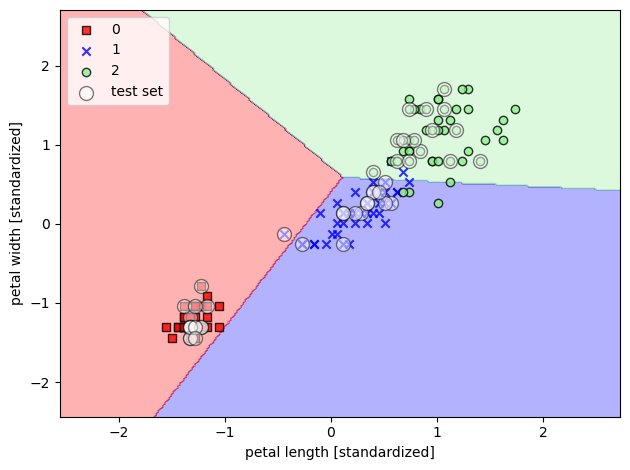

In [69]:
# 7.
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, 
                      y=y_combined, 
                      classifier=ppn, 
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()